# 🧪 Isolation Forest for Anomaly Detection – Guided Notebook

## 📘 Introduction

In this notebook, we will explore **Isolation Forest**, a powerful and efficient algorithm for detecting anomalies in datasets.

The goal is to provide a **step-by-step, practical guide** that covers the entire workflow, including:

- 🔨 **Synthetic data generation** using clusters and injected outliers  
- 👀 **Data visualization** to understand the distribution and anomalies  
- 🌲 **Training the Isolation Forest model** on unlabeled data  
- 📈 **Scoring and prediction** of anomalies  
- 🧾 **Evaluation using classification metrics**  
- 🎨 **Side-by-side visual comparison** of ground truth vs. predictions  

Isolation Forest is particularly well-suited for **unsupervised anomaly detection** tasks because it isolates anomalies instead of profiling normal points. This property allows it to perform well even on high-dimensional datasets and in the presence of noisy data.

By the end of this notebook, you'll understand not only how Isolation Forest works but also **how to apply and evaluate it in practice**.

---

Let’s get started! 🚀


In [1]:
# 🧪 Isolation Forest - Complete Guide with Synthetic Data

## 1. 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

sns.set(style="whitegrid")
np.random.seed(42)

In [2]:
## 2. 📊 Generate Synthetic Data

# Generate normal data (clusters)
X_normal, _ = make_blobs(n_samples=300, centers=[[0, 0], [5, 5]], cluster_std=0.8, random_state=42)

# Generate some outliers
X_outliers = np.random.uniform(low=-6, high=10, size=(30, 2))

# Combine the data
X = np.vstack([X_normal, X_outliers])
y_true = np.hstack([np.ones(len(X_normal)), -1 * np.ones(len(X_outliers))])  # 1 = normal, -1 = outlier

print(f"Total samples: {len(X)}, Normal: {len(X_normal)}, Outliers: {len(X_outliers)}")


Total samples: 330, Normal: 300, Outliers: 30


c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


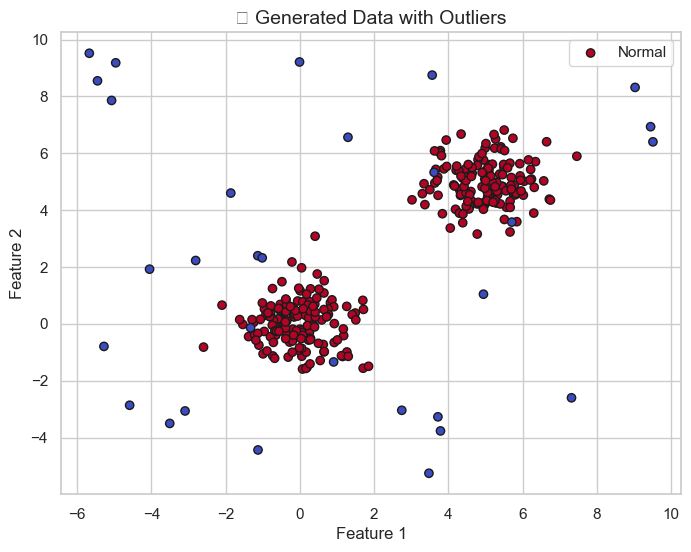

In [3]:
## 3. 🧼 Visualize the Dataset

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', edgecolors='k')
plt.title("📊 Generated Data with Outliers", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Normal", "Outliers"])
plt.show()


In [4]:
## 4. 🌲 Train Isolation Forest

iso_forest = IsolationForest(n_estimators=100, contamination=0.09, random_state=42)
iso_forest.fit(X)

# Predictions
y_pred = iso_forest.predict(X)  # 1 for inliers, -1 for outliers
scores = iso_forest.decision_function(X)  # The higher, the more normal

# Count detected anomalies
print(f"Predicted outliers: {sum(y_pred == -1)}")


Predicted outliers: 30


c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


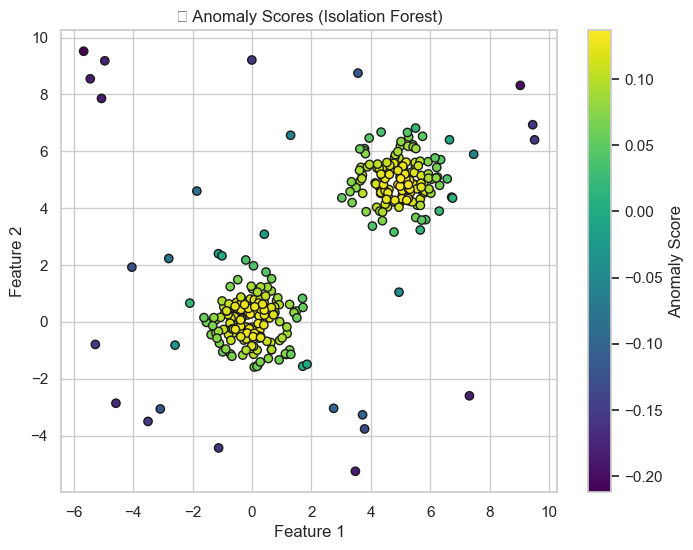

In [5]:
## 5. 📈 Visualize Anomaly Scores

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=scores, cmap="viridis", edgecolors='k')
plt.colorbar(scatter, label="Anomaly Score")
plt.title("🟢 Anomaly Scores (Isolation Forest)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [6]:
## 6. 📏 Evaluate Model Performance

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Outlier", "Normal"]))

print(f"🎯 Precision: {precision_score(y_true, y_pred, pos_label=-1):.2f}")
print(f"🔁 Recall: {recall_score(y_true, y_pred, pos_label=-1):.2f}")


🔍 Confusion Matrix:
[[ 25   5]
 [  5 295]]

📋 Classification Report:
              precision    recall  f1-score   support

     Outlier       0.83      0.83      0.83        30
      Normal       0.98      0.98      0.98       300

    accuracy                           0.97       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.97      0.97      0.97       330

🎯 Precision: 0.83
🔁 Recall: 0.83


C:\Users\berme\AppData\Local\Temp\ipykernel_17472\1523462111.py:17: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\berme\AppData\Local\Temp\ipykernel_17472\1523462111.py:17: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


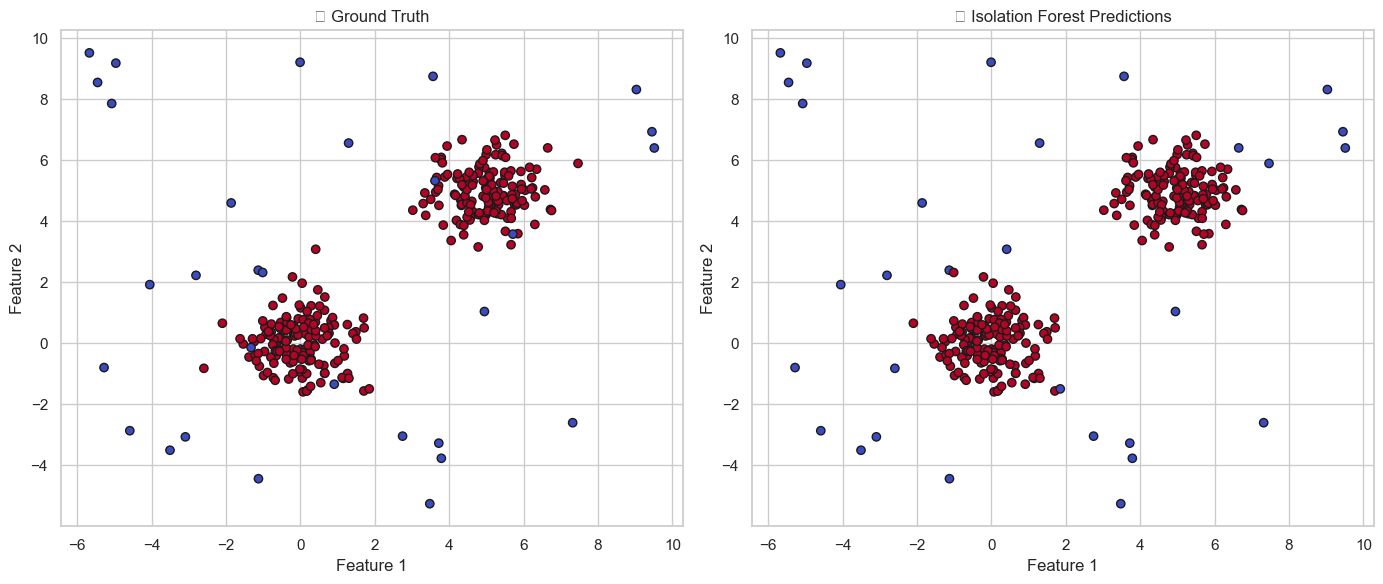

In [7]:
## 7. 🔍 Visual Comparison of True vs Predicted Labels

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Ground Truth
ax[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", edgecolors='k')
ax[0].set_title("✅ Ground Truth")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Predictions
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", edgecolors='k')
ax[1].set_title("🔮 Isolation Forest Predictions")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [8]:
## 8. ✅ Summary

print("📌 Summary:")
print(f"- Normal samples: {len(X_normal)}")
print(f"- Injected outliers: {len(X_outliers)}")
print(f"- Outliers detected: {np.sum(y_pred == -1)}")
print(f"- Isolation Forest successfully identified {np.sum((y_pred == -1) & (y_true == -1))} true outliers.")


📌 Summary:
- Normal samples: 300
- Injected outliers: 30
- Outliers detected: 30
- Isolation Forest successfully identified 25 true outliers.
